In [118]:
from polyleven import levenshtein
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();
%matplotlib inline

In [119]:
def get_levenshtein_distance(word1, word2):
    return levenshtein(word1, word2)

In [120]:
def preprocess_table(df, ignoreNimFasele=False):
    df.loc[
        (df["is_realword"] == "True") | (df["is_realword"] == "1.0"), "is_realword"
    ] = True
    df.loc[
        (df["is_realword"] == "False") | (df["is_realword"] == "0.0"), "is_realword"
    ] = False

    if ignoreNimFasele:
        df["candidate_word"] = df["candidate_word"].apply(
            lambda x: "".join(x.split("\u200c"))
        )
        df["correct_word"] = df["correct_word"].apply(
            lambda x: "".join(x.split("\u200c"))
        )
        df["mix_word"] = df["mix_word"].apply(lambda x: "".join(x.split("\u200c")))
        
    # type_counts = np.unique(df["type"], return_counts=True)
    # print("total:", len(df))
    # for idx, (type_, count) in enumerate(zip(*type_counts)):
    #     print(str(idx + 1) + ")", type_, count)

    return df

In [121]:
thereshold = ["1e-1", "1e-3", "1e-5", "1e-7", "1e-9"]

##### Base Model ->

HooshvareLab/bert-base-parsbert-uncased [MASK] (unbiased 1:51:18) (biased 1:55:03)


In [122]:
base_model = {"b": {}, "unb": {}}

for th in thereshold:
    base_model["b"][th] = preprocess_table(
        pd.read_csv(
            "./data/evaluation results/base_experiments/base_b_" + th + ".csv",
            index_col=0,
        )
    )

    base_model["unb"][th] = preprocess_table(
        pd.read_csv(
            "./data/evaluation results/base_experiments/base_unb_" + th + ".csv",
            index_col=0,
        )
    )

##### Bert_zwnj Model ->

HooshvareLab/bert-fa-zwnj-base [MASK] (unbiased 1:22:12) (biased 1:40:25)


In [123]:
bert_zwnj_model = {"b": {}, "unb": {}}

for th in thereshold:
    bert_zwnj_model["b"][th] = preprocess_table(
        pd.read_csv(
            "./data/evaluation results/bert_znwj_experiments/bert_znwj_b_"
            + th
            + ".csv",
            index_col=0,
        )
    )

    bert_zwnj_model["unb"][th] = preprocess_table(
        pd.read_csv(
            "./data/evaluation results/bert_znwj_experiments/bert_znwj_unb_"
            + th
            + ".csv",
            index_col=0,
        )
    )

In [124]:
thereshold_100 = ["1e-3", "1e-5", "1e-7"]

bert_zwnj_100_model = {"b": {}, "unb": {}}

for th in thereshold_100:
    bert_zwnj_100_model["b"][th] = preprocess_table(
        pd.read_csv(
            "./data/evaluation results/bert_znwj_experiments/bert_znwj_b_100_"
            + th
            + ".csv",
            index_col=0,
        )
    )

    bert_zwnj_100_model["unb"][th] = preprocess_table(
        pd.read_csv(
            "./data/evaluation results/bert_znwj_experiments/bert_znwj_unb_100_"
            + th
            + ".csv",
            index_col=0,
        )
    )

In [125]:
bert_zwnj_article_v1_model = {"unb": {}}

bert_zwnj_article_v1_model["unb"]["NA"] = preprocess_table(
    pd.read_csv(
        "./data/evaluation results/bert_znwj_experiments/bert_zwnj_unb_article_v1"
        + ".csv",
        index_col=0,
    )
)

bert_zwnj_article_v2_model = {"unb": {}}

bert_zwnj_article_v2_model["unb"]["NA"] = preprocess_table(
    pd.read_csv(
        "./data/evaluation results/bert_znwj_experiments/bert_zwnj_unb_article_v2"
        + ".csv",
        index_col=0,
    )
)

##### Bert_pure Model ->

HooshvareLab/bert-fa-base-uncased (pure bert) [MASK] (unbiased 109.342 m) (biased 197.432 m)


In [126]:
bert_pure_model = {"b": {}, "unb": {}}

for th in thereshold:
    bert_pure_model["b"][th] = preprocess_table(
        pd.read_csv(
            "./data/evaluation results/pure_bert_experiments/pure_bert_b_"
            + th
            + ".csv",
            index_col=0,
        )
    )

    bert_pure_model["unb"][th] = preprocess_table(
        pd.read_csv(
            "./data/evaluation results/pure_bert_experiments/pure_bert_unb_"
            + th
            + ".csv",
            index_col=0,
        )
    )

In [127]:
bert_pure_100_model = {"b": {}, "unb": {}}

for th in thereshold_100:
    bert_pure_100_model["b"][th] = preprocess_table(
        pd.read_csv(
            "./data/evaluation results/pure_bert_experiments/pure_bert_b_100_"
            + th
            + ".csv",
            index_col=0,
        )
    )

    bert_pure_100_model["unb"][th] = preprocess_table(
        pd.read_csv(
            "./data/evaluation results/pure_bert_experiments/pure_bert_unb_100_"
            + th
            + ".csv",
            index_col=0,
        )
    )

In [128]:
bert_pure_article_v1_model = {"unb": {}}

bert_pure_article_v1_model["unb"]["NA"] = preprocess_table(
    pd.read_csv(
        "./data/evaluation results/pure_bert_experiments/pure_bert_unb_article_v1"
        + ".csv",
        index_col=0,
    )
)

bert_pure_article_v2_model = {"unb": {}}

bert_pure_article_v2_model["unb"]["NA"] = preprocess_table(
    pd.read_csv(
        "./data/evaluation results/pure_bert_experiments/pure_bert_unb_article_v2"
        + ".csv",
        index_col=0,
    )
)

##### Distilbert Model ->

HooshvareLab/distilbert-fa-zwnj-base [MASK] (unbiased 83.277 m) (biased 90.302 m)


In [129]:
distilbert_model = {"b": {}, "unb": {}}

for th in thereshold:
    distilbert_model["b"][th] = preprocess_table(
        pd.read_csv(
            "./data/evaluation results/distilbert_experiments/distilbert_b_"
            + th
            + ".csv",
            index_col=0,
        )
    )

    distilbert_model["unb"][th] = preprocess_table(
        pd.read_csv(
            "./data/evaluation results/distilbert_experiments/distilbert_unb_"
            + th
            + ".csv",
            index_col=0,
        )
    )

#### Non-Real Words


In [130]:
def non_real_word_table(df):
    total_nonrealword_errors = len(
        df[
            (df["type"] == "polymorph_nonrealword_error")
            | (df["type"] == "substitution_nonrealword_error")
            | (df["type"] == "keyboard_nonrealword_error")
        ]
    )

    total_polymorph_nonrealword_errors = len(
        df[(df["type"] == "polymorph_nonrealword_error")]
    )
    total_substitution_nonrealword_errors = len(
        df[(df["type"] == "substitution_nonrealword_error")]
    )
    total_keyboard_nonrealword_errors = len(
        df[(df["type"] == "keyboard_nonrealword_error")]
    )

    # -----------------------------------------------------------------------------------------

    total_nonrealword_t = len(
        df[
            (
                (df["type"] == "polymorph_nonrealword_error")
                | (df["type"] == "substitution_nonrealword_error")
                | (df["type"] == "keyboard_nonrealword_error")
            )
            & (df["mix_word"] == df["correct_word"])
        ]
    )

    total_polymorph_nonrealword_t = len(
        df[
            (df["type"] == "polymorph_nonrealword_error")
            & (df["mix_word"] == df["correct_word"])
        ]
    )

    total_substitution_nonrealword_t = len(
        df[
            (df["type"] == "substitution_nonrealword_error")
            & (df["mix_word"] == df["correct_word"])
        ]
    )

    total_keyboard_nonrealword_t = len(
        df[
            (df["type"] == "keyboard_nonrealword_error")
            & (df["mix_word"] == df["correct_word"])
        ]
    )

    

    # -----------------------------------------------------------------------------------------

    substitution_nonrealword_precision = round(
        100
        * total_substitution_nonrealword_t
        / (total_substitution_nonrealword_errors),
        2,
    )
    polymorph_nonrealword_precision = round(
        100 * total_polymorph_nonrealword_t / (total_polymorph_nonrealword_errors), 2
    )
    keyboard_nonrealword_precision = round(
        100 * total_keyboard_nonrealword_t / (total_keyboard_nonrealword_errors), 2
    )

    micro_total_nonrealword_precision = round(
        100 * total_nonrealword_t / total_nonrealword_errors, 2
    )
    macro_total_nonrealword_precision = round(
        (
            substitution_nonrealword_precision
            + polymorph_nonrealword_precision
            + keyboard_nonrealword_precision
        )
        / 3,
        2,
    )

    # -----------------------------------------------------------------------------------------

    nonreal_table = pd.DataFrame(
        {
            "All": [
                total_nonrealword_errors,
                total_polymorph_nonrealword_errors,
                total_substitution_nonrealword_errors,
                total_keyboard_nonrealword_errors,
            ],
            "Corrected": [
                total_nonrealword_t,
                total_polymorph_nonrealword_t,
                total_substitution_nonrealword_t,
                total_keyboard_nonrealword_t,
            ],
            "Precision": [
                f"{micro_total_nonrealword_precision} (Micro), {macro_total_nonrealword_precision} (Macro)",
                polymorph_nonrealword_precision,
                substitution_nonrealword_precision,
                keyboard_nonrealword_precision,
            ],
        },
        index=["Total", "Polymorph", "Substitution", "Keyboard"],
    )
    nonreal_table.index.name = "Non-Real Word"

    return nonreal_table

#### Real Words


In [131]:
def real_word_table(df):
    total_realword_errors = len(
        df[
            (df["type"] == "homophone_realword_error")
            | (df["type"] == "substitution_realword_error")
            | (df["type"] == "keyboard_realword_error")
        ]
    )

    total_realword_corrects = len(
        df[
            (df["type"] == "homophone_realword_correct")
            | (df["type"] == "substitution_realword_correct")
            | (df["type"] == "keyboard_realword_correct")
        ]
    )

    total_homophone_realword_errors = len(
        df[(df["type"] == "homophone_realword_error")]
    )
    total_homophone_realword_corrects = len(
        df[(df["type"] == "homophone_realword_correct")]
    )

    total_substitution_realword_errors = len(
        df[(df["type"] == "substitution_realword_error")]
    )
    total_substitution_realword_corrects = len(
        df[(df["type"] == "substitution_realword_correct")]
    )

    total_keyboard_realword_errors = len(df[(df["type"] == "keyboard_realword_error")])
    total_keyboard_realword_corrects = len(
        df[(df["type"] == "keyboard_realword_correct")]
    )

    # -----------------------------------------------------------------------------------------

    total_realword_tp = len(
        df[
            (
                (df["type"] == "homophone_realword_error")
                | (df["type"] == "substitution_realword_error")
                | (df["type"] == "keyboard_realword_error")
            )
            & (df["mix_word"] == df["correct_word"])
        ]
    )

    total_homophone_realword_tp = len(
        df[
            (df["type"] == "homophone_realword_error")
            & (df["mix_word"] == df["correct_word"])
        ]
    )

    total_substitution_realword_tp = len(
        df[
            (df["type"] == "substitution_realword_error")
            & (df["mix_word"] == df["correct_word"])
        ]
    )

    total_keyboard_realword_tp = len(
        df[
            (df["type"] == "keyboard_realword_error")
            & (df["mix_word"] == df["correct_word"])
        ]
    )

    # -----------------------------------------------------------------------------------------

    total_realword_fn = len(
        df[
            (
                (df["type"] == "homophone_realword_error")
                | (df["type"] == "substitution_realword_error")
                | (df["type"] == "keyboard_realword_error")
            )
            & (df["mix_word"] != df["correct_word"])
        ]
    )

    total_homophone_realword_fn = len(
        df[
            (df["type"] == "homophone_realword_error")
            & (df["mix_word"] != df["correct_word"])
        ]
    )

    total_substitution_realword_fn = len(
        df[
            (df["type"] == "substitution_realword_error")
            & (df["mix_word"] != df["correct_word"])
        ]
    )

    total_keyboard_realword_fn = len(
        df[
            (df["type"] == "keyboard_realword_error")
            & (df["mix_word"] != df["correct_word"])
        ]
    )

    # -----------------------------------------------------------------------------------------

    total_realword_tn = len(
        df[
            (
                (df["type"] == "homophone_realword_correct")
                | (df["type"] == "substitution_realword_correct")
                | (df["type"] == "keyboard_realword_correct")
            )
            & (df["mix_word"] == df["correct_word"])
        ]
    )

    total_homophone_realword_tn = len(
        df[
            (df["type"] == "homophone_realword_correct")
            & (df["mix_word"] == df["correct_word"])
        ]
    )

    total_substitution_realword_tn = len(
        df[
            (df["type"] == "substitution_realword_correct")
            & (df["mix_word"] == df["correct_word"])
        ]
    )

    total_keyboard_realword_tn = len(
        df[
            (df["type"] == "keyboard_realword_correct")
            & (df["mix_word"] == df["correct_word"])
        ]
    )

    # -----------------------------------------------------------------------------------------

    total_realword_fp = len(
        df[
            (
                (df["type"] == "homophone_realword_correct")
                | (df["type"] == "substitution_realword_correct")
                | (df["type"] == "keyboard_realword_correct")
            )
            & (df["mix_word"] != df["correct_word"])
        ]
    )

    total_homophone_realword_fp = len(
        df[
            (df["type"] == "homophone_realword_correct")
            & (df["mix_word"] != df["correct_word"])
        ]
    )

    total_substitution_realword_fp = len(
        df[
            (df["type"] == "substitution_realword_correct")
            & (df["mix_word"] != df["correct_word"])
        ]
    )

    total_keyboard_realword_fp = len(
        df[
            (df["type"] == "keyboard_realword_correct")
            & (df["mix_word"] != df["correct_word"])
        ]
    )

    # -----------------------------------------------------------------------------------------

    homophone_realword_pre = round(
        100
        * total_homophone_realword_tp
        / (total_homophone_realword_tp + total_homophone_realword_fp + 1e-6),
        2,
    )
    homophone_realword_rec = round(
        100
        * total_homophone_realword_tp
        / (total_homophone_realword_tp + total_homophone_realword_fn + 1e-6),
        2,
    )
    homophone_realword_fpr = round(
        100
        * total_homophone_realword_fp
        / (total_homophone_realword_fp + total_homophone_realword_tn + 1e-6),
        2,
    )
    homophone_realword_acc = round(
        100
        * (total_homophone_realword_tp + total_homophone_realword_tn)
        / (
            total_homophone_realword_tp
            + total_homophone_realword_tn
            + total_homophone_realword_fp
            + total_homophone_realword_fn
            + 1e-6
        ),
        2,
    )
    homophone_realword_f1 = round(
        (2 * homophone_realword_pre * homophone_realword_rec)
        / (homophone_realword_pre + homophone_realword_rec + 1e-6),
        2,
    )

    substitution_realword_pre = round(
        100
        * total_substitution_realword_tp
        / (total_substitution_realword_tp + total_substitution_realword_fp + 1e-6),
        2,
    )
    substitution_realword_rec = round(
        100
        * total_substitution_realword_tp
        / (total_substitution_realword_tp + total_substitution_realword_fn + 1e-6),
        2,
    )
    substitution_realword_fpr = round(
        100
        * total_substitution_realword_fp
        / (total_substitution_realword_fp + total_substitution_realword_tn + 1e-6),
        2,
    )
    substitution_realword_acc = round(
        100
        * (total_substitution_realword_tp + total_substitution_realword_tn)
        / (
            total_substitution_realword_tp
            + total_substitution_realword_tn
            + total_substitution_realword_fp
            + total_substitution_realword_fn
            + 1e-6
        ),
        2,
    )
    substitution_realword_f1 = round(
        (2 * substitution_realword_pre * substitution_realword_rec)
        / (substitution_realword_pre + homophone_realword_rec + 1e-6),
        2,
    )

    keyboard_realword_pre = round(
        100
        * total_keyboard_realword_tp
        / (total_keyboard_realword_tp + total_keyboard_realword_fp + 1e-6),
        2,
    )
    keyboard_realword_rec = round(
        100
        * total_keyboard_realword_tp
        / (total_keyboard_realword_tp + total_keyboard_realword_fn + 1e-6),
        2,
    )
    keyboard_realword_fpr = round(
        100
        * total_keyboard_realword_fp
        / (total_keyboard_realword_fp + total_keyboard_realword_tn + 1e-6),
        2,
    )
    keyboard_realword_acc = round(
        100
        * (total_keyboard_realword_tp + total_keyboard_realword_tn)
        / (
            total_keyboard_realword_tp
            + total_keyboard_realword_tn
            + total_keyboard_realword_fp
            + total_keyboard_realword_fn
            + 1e-6
        ),
        2,
    )
    keyboard_realword_f1 = round(
        (2 * keyboard_realword_pre * keyboard_realword_rec)
        / (keyboard_realword_pre + keyboard_realword_rec + 1e-6),
        2,
    )

    micro_total_realword_pre = round(
        100 * total_realword_tp / (total_realword_tp + total_realword_fp + 1e-6), 2
    )
    micro_total_realword_rec = round(
        100 * total_realword_tp / (total_realword_tp + total_realword_fn + 1e-6), 2
    )
    micro_total_realword_fpr = round(
        100
        * total_realword_fp
        / (total_realword_fp + total_realword_tn + 1e-6),
        2
    )
    micro_total_realword_acc = round(
        100
        * (total_realword_tp + total_realword_tn)
        / (
            total_realword_tp
            + total_realword_tn
            + total_realword_fp
            + total_realword_fn
            + 1e-6
        ),
        2,
    )
    micro_total_realword_f1 = round(
        (2 * micro_total_realword_pre * micro_total_realword_rec)
        / (micro_total_realword_pre + micro_total_realword_rec + 1e-6),
        2,
    )

    macro_total_realword_pre = round(
        (substitution_realword_pre + keyboard_realword_pre + homophone_realword_pre)
        / 3,
        2,
    )
    macro_total_realword_rec = round(
        (substitution_realword_rec + keyboard_realword_rec + homophone_realword_rec)
        / 3,
        2,
    )
    macro_total_realword_fpr = round(
        (substitution_realword_fpr + keyboard_realword_fpr + homophone_realword_fpr)
        / 3,
        2,
    )
    macro_total_realword_acc = round(
        (substitution_realword_acc + keyboard_realword_acc + homophone_realword_acc)
        / 3,
        2,
    )
    macro_total_realword_f1 = round(
        (substitution_realword_f1 + keyboard_realword_f1 + homophone_realword_f1) / 3, 2
    )

    # -----------------------------------------------------------------------------------------

    real_table = pd.DataFrame(
        {
            "All": [
                total_realword_errors,
                total_realword_corrects,
                total_homophone_realword_errors,
                total_homophone_realword_corrects,
                total_substitution_realword_errors,
                total_substitution_realword_corrects,
                total_keyboard_realword_errors,
                total_keyboard_realword_corrects,
            ],
            "True": [
                total_realword_tp,
                total_realword_tn,
                total_homophone_realword_tp,
                total_homophone_realword_tn,
                total_substitution_realword_tp,
                total_substitution_realword_tn,
                total_keyboard_realword_tp,
                total_keyboard_realword_tn,
            ],
            "False": [
                total_realword_fp,
                total_realword_fn,
                total_homophone_realword_fp,
                total_homophone_realword_fn,
                total_substitution_realword_fp,
                total_substitution_realword_fn,
                total_keyboard_realword_fp,
                total_keyboard_realword_fn,
            ],
            "Precision": [
                f"{micro_total_realword_pre} (Micro), {macro_total_realword_pre} (Macro)",
                "",
                homophone_realword_pre,
                "",
                substitution_realword_pre,
                "",
                keyboard_realword_pre,
                "",
            ],
            "Recall": [
                f"{micro_total_realword_rec} (Micro), {macro_total_realword_rec} (Macro)",
                "",
                homophone_realword_rec,
                "",
                substitution_realword_rec,
                "",
                keyboard_realword_rec,
                "",
            ],
            "FP Rate": [
                f"{micro_total_realword_fpr} (Micro), {macro_total_realword_fpr} (Macro)",
                "",
                homophone_realword_fpr,
                "",
                substitution_realword_fpr,
                "",
                keyboard_realword_fpr,
                "",
            ],
            "Accuarcy": [
                f"{micro_total_realword_acc} (Micro), {macro_total_realword_acc} (Macro)",
                "",
                homophone_realword_acc,
                "",
                substitution_realword_acc,
                "",
                keyboard_realword_acc,
                "",
            ],
            "F1-Score": [
                f"{micro_total_realword_f1} (Micro), {macro_total_realword_f1} (Macro)",
                "",
                homophone_realword_f1,
                "",
                substitution_realword_f1,
                "",
                keyboard_realword_f1,
                "",
            ],
        },
        index=pd.MultiIndex.from_product(
            [["Total", "Homophone", "Substitution", "Keyboard"], ["Error", "Correct"]],
            names=["Real Word", "Type"],
        ),
    )

    return real_table

In [132]:
def retrieve_nonrealword_prec(model, thereshold, bias_type):
    
    micro_pre = []
    macro_pre = []
    
    
    pre = non_real_word_table(model[bias_type][thereshold[0]]).loc[
        ["Total"], ["Precision"]
    ].values[0, 0]
    mic_pre, mac_pre = pre.split(",")
    
    micro_pre.append(float(mic_pre.strip()[:-8]) / 100)
    macro_pre.append(float(mac_pre.strip()[:-8]) / 100)
        

    return {
        "micro_pre": micro_pre,
        "macro_pre": macro_pre,
    }

In [133]:
def retrieve_realword_tpr_fpr_prec(model, thereshold, bias_type):
    micro_tpr = []
    micro_fpr = []
    micro_pre = []
    micro_f1 = []
    micro_acc = []

    macro_tpr = []
    macro_fpr = []
    macro_pre = []
    macro_f1 = []
    macro_acc = []
    
    idx = pd.IndexSlice
    
    for th in thereshold:
        tpr, fpr, pre, f1, acc = real_word_table(model[bias_type][th]).loc[
            idx["Total", "Error"], ["Recall", "FP Rate", "Precision", "F1-Score", "Accuarcy"]
        ]
        mic_tpr, mac_tpr = tpr.split(",")
        mic_fpr, mac_fpr = fpr.split(",")
        mic_pre, mac_pre = pre.split(",")
        mic_f1, mac_f1 = f1.split(",")
        mic_acc, mac_acc = acc.split(",")

        micro_tpr.append(float(mic_tpr.strip()[:-8]) / 100) # remove (Micro) and (Macro) phrase
        macro_tpr.append(float(mac_tpr.strip()[:-8]) / 100)

        micro_fpr.append(float(mic_fpr.strip()[:-8]) / 100)
        macro_fpr.append(float(mac_fpr.strip()[:-8]) / 100)
        
        micro_pre.append(float(mic_pre.strip()[:-8]) / 100)
        macro_pre.append(float(mac_pre.strip()[:-8]) / 100)
        
        micro_f1.append(float(mic_f1.strip()[:-8]) / 100)
        macro_f1.append(float(mac_f1.strip()[:-8]) / 100)
        
        micro_acc.append(float(mic_acc.strip()[:-8]) / 100)
        macro_acc.append(float(mac_acc.strip()[:-8]) / 100)

    return {
        "micro_tpr": micro_tpr,
        "macro_tpr": macro_tpr,
        "micro_fpr": micro_fpr,
        "macro_fpr": macro_fpr,
        "micro_pre": micro_pre,
        "macro_pre": macro_pre,
        "micro_f1": micro_f1,
        "macro_f1": macro_f1,
        "micro_acc": micro_acc,
        "macro_acc": macro_acc
    }

In [134]:
base_model_unb_roc = retrieve_realword_tpr_fpr_prec(base_model, thereshold, "unb")
bert_pure_model_unb_roc = retrieve_realword_tpr_fpr_prec(bert_pure_model, thereshold, "unb")
bert_zwnj_model_unb_roc = retrieve_realword_tpr_fpr_prec(bert_zwnj_model, thereshold, "unb")
distilbert_model_unb_roc = retrieve_realword_tpr_fpr_prec(distilbert_model, thereshold, "unb")

In [135]:
bert_zwnj_model_b_roc = retrieve_realword_tpr_fpr_prec(bert_zwnj_model, thereshold, "b")
base_model_b_roc = retrieve_realword_tpr_fpr_prec(base_model, thereshold, "b")
bert_pure_model_b_roc = retrieve_realword_tpr_fpr_prec(bert_pure_model, thereshold, "b")
distilbert_model_b_roc = retrieve_realword_tpr_fpr_prec(distilbert_model, thereshold, "b")

In [136]:
base_model_unb_nroc = retrieve_nonrealword_prec(base_model, thereshold, "unb")
bert_pure_model_unb_nroc = retrieve_nonrealword_prec(bert_pure_model, thereshold, "unb")
bert_zwnj_model_unb_nroc = retrieve_nonrealword_prec(bert_zwnj_model, thereshold, "unb")
distilbert_model_unb_nroc = retrieve_nonrealword_prec(distilbert_model, thereshold, "unb")

In [137]:
base_model_b_nroc = retrieve_nonrealword_prec(base_model, thereshold, "b")
bert_pure_model_b_nroc = retrieve_nonrealword_prec(bert_pure_model, thereshold, "b")
bert_zwnj_model_b_nroc = retrieve_nonrealword_prec(bert_zwnj_model, thereshold, "b")
distilbert_model_b_nroc = retrieve_nonrealword_prec(distilbert_model, thereshold, "b")

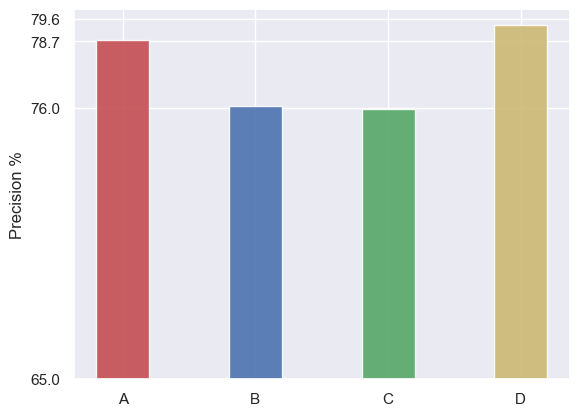

In [138]:
#  ['bert-base-parsbert-uncased', 'bert-fa-zwnj-base', 'distilbert-fa-zwnj-base', 'bert-fa-base-uncased']

plt.bar(
    ['A', 'B', 'C', 'D'], 
    [base_model_unb_nroc['micro_pre'][0] * 100,
    bert_zwnj_model_unb_nroc['micro_pre'][0] * 100,
    distilbert_model_unb_nroc['micro_pre'][0] * 100,
    bert_pure_model_unb_nroc['micro_pre'][0] * 100,], 0.4, alpha=0.9, color=['r', 'b', 'g', 'y']
);


# plt.xticks(rotation=40);
plt.ylabel('Precision %')
plt.yticks(ticks=[65, 76, 78.7, 79.6]);
plt.ylim([65, 80]);
# plt.savefig("C:/Users/asus/OneDrive/Desktop/VecPictures/fig1.pdf", format="pdf", bbox_inches="tight")

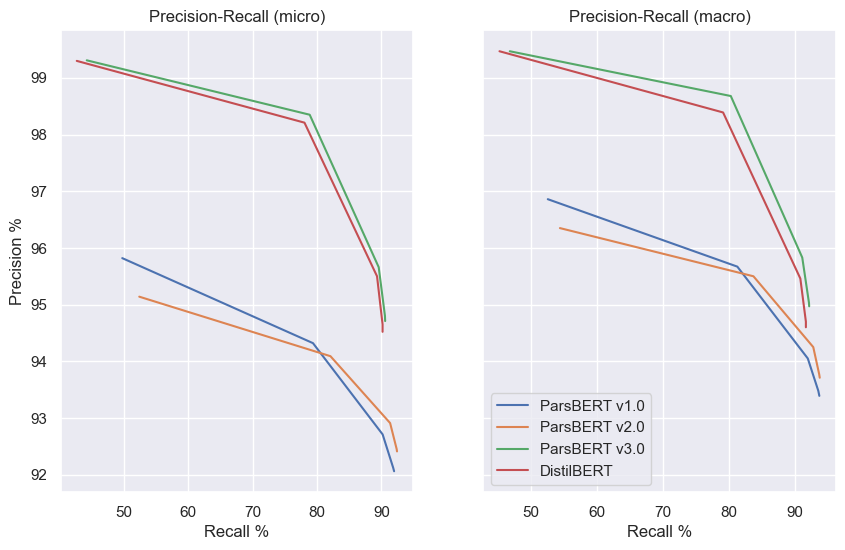

In [139]:
fig, axe = plt.subplots(1, 2, figsize=(10, 6), sharey='row')
# DistilBERT, ParsBERT v1.0, ParsBERT v3.0, ParsBERT v2.0
for i in range(2):
    
    x = 'micro_tpr' if i == 0 else 'macro_tpr'
    y = 'micro_pre' if i == 0 else 'macro_pre'

    axe[i].plot(
        base_model_unb_roc[x],
        base_model_unb_roc[y],
        label="ParsBERT v1.0",
    )
    axe[i].plot(
        bert_pure_model_unb_roc[x],
        bert_pure_model_unb_roc[y],
        label="ParsBERT v2.0",
    )
    axe[i].plot(
        bert_zwnj_model_unb_roc[x],
        bert_zwnj_model_unb_roc[y],
        label="ParsBERT v3.0",
    )
    
    axe[i].plot(
        distilbert_model_unb_roc[x],
        distilbert_model_unb_roc[y],
        label="DistilBERT",
    )
    axe[i].set_xlabel('Recall %')
    axe[i].set_xticks([0.5, 0.6, 0.7, 0.8, .9], labels=['50', '60', '70', '80', '90'])
    if i == 0:
        axe[i].set_ylabel('Precision %')
        axe[i].set_title("Precision-Recall (micro)")   
        axe[i].set_yticks([0.92, 0.93, 0.94, 0.95, .96, .97, .98, .99], 
                          labels=[92, 93, 94, 95, 96, 97, 98, 99]) 
    else:
        axe[i].set_title("Precision-Recall (macro)")
    
        axe[i].legend()
# plt.savefig("C:/Users/asus/OneDrive/Desktop/VecPictures/fig2.pdf", format="pdf", bbox_inches="tight")

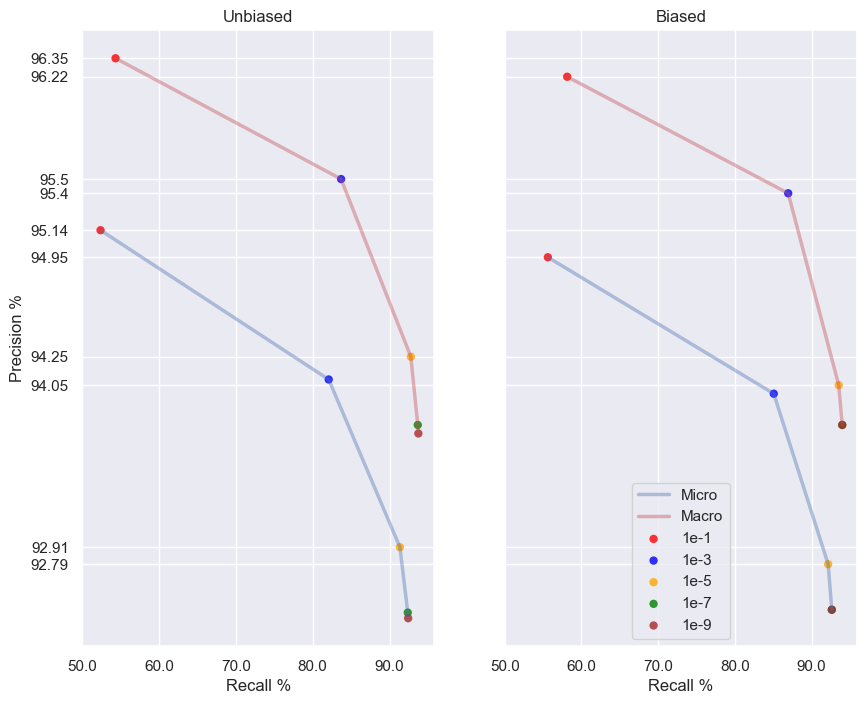

In [140]:
mm = bert_pure_model_unb_roc
mm2 = bert_pure_model_b_roc
name = "bert-fa-base-uncased"
# DistilBERT, ParsBERT v1.0, ParsBERT v3.0, ParsBERT v2.0
# mm = bert_zwnj_model_unb_roc
# mm2 = bert_zwnj_model_b_roc
# name = 'bert-fa-zwnj-base'
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharey=True)
axes[0].plot(
    mm["micro_tpr"],
    mm["micro_pre"],
    label=f"Micro",
    alpha=0.4,
    linewidth=2.5,
    color="b",
)

axes[1].plot(
    mm2["micro_tpr"],
    mm2["micro_pre"],
    label=f"Micro",
    alpha=0.4,
    linewidth=2.5,
    color="b",
)

axes[0].plot(
    mm["macro_tpr"],
    mm["macro_pre"],
    label=f"Macro",
    alpha=0.4,
    linewidth=2.5,
    color="r",
)

axes[1].plot(
    mm2["macro_tpr"],
    mm2["macro_pre"],
    label=f"Macro",
    alpha=0.4,
    linewidth=2.5,
    color="r",
)

color = {
    0: "red",
    1: "blue",
    2: "orange",
    3: "green",
    4: "brown",
    5: "grey",
    6: "yellow",
    7: "pink",
}
for i, th in zip(range(len(thereshold)), thereshold):
    axes[0].scatter(
        [mm["micro_tpr"][i], mm["macro_tpr"][i]],
        [mm["micro_pre"][i], mm["macro_pre"][i]],
        marker="o",
        c=color[i],
        label=th,
        alpha=0.8,
        edgecolors="none",
    )

    axes[1].scatter(
        [mm2["micro_tpr"][i], mm2["macro_tpr"][i]],
        [mm2["micro_pre"][i], mm2["macro_pre"][i]],
        marker="o",
        c=color[i],
        label=th,
        alpha=0.8,
        edgecolors="none",
    )


axes[0].set_xlabel("Recall %")
axes[0].set_yticks(
    mm["macro_pre"][0:3]
    + mm["micro_pre"][0:1]
    + mm["micro_pre"][2:3]
    + mm2["macro_pre"][0:3]
    + mm2["micro_pre"][0:1]
    + mm2["micro_pre"][2:3],
    labels=np.multiply(mm["macro_pre"][0:3]
    + mm["micro_pre"][0:1]
    + mm["micro_pre"][2:3]
    + mm2["macro_pre"][0:3]
    + mm2["micro_pre"][0:1]
    + mm2["micro_pre"][2:3], 100.0),
)
axes[0].set_ylabel("Precision %")
axes[0].set_title("Unbiased")
axes[0].set_xticks([.5, 0.6, 0.7, 0.8, 0.9], labels=[50.0, 60.0, 70.0, 80.0, 90.0])

# axes[1].set_yticks (mm2['macro_pre'][0:3] + mm2['micro_pre'][0:3])
axes[1].set_xlabel("Recall %")
axes[1].set_title("Biased")
axes[1].set_xticks([.5, 0.6, 0.7, 0.8, 0.9], labels=[50.0, 60.0, 70.0, 80.0, 90.0])
axes[1].legend(loc=8);
# plt.savefig("C:/Users/asus/OneDrive/Desktop/VecPictures/fig3.pdf", format="pdf", bbox_inches="tight")

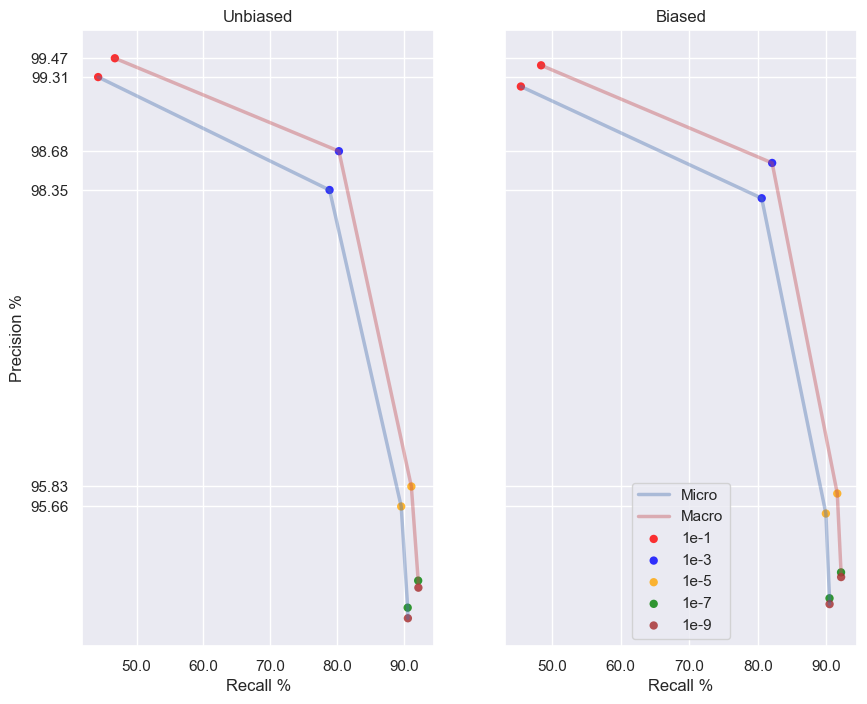

In [141]:
# mm = bert_pure_model_unb_roc
# mm2 = bert_pure_model_b_roc
# name = "bert-fa-base-uncased"

mm = bert_zwnj_model_unb_roc
mm2 = bert_zwnj_model_b_roc
name = 'bert-fa-zwnj-base'
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharey=True)
axes[0].plot(
    mm["micro_tpr"],
    mm["micro_pre"],
    label=f"Micro",
    alpha=0.4,
    linewidth=2.5,
    color="b",
)

axes[1].plot(
    mm2["micro_tpr"],
    mm2["micro_pre"],
    label=f"Micro",
    alpha=0.4,
    linewidth=2.5,
    color="b",
)

axes[0].plot(
    mm["macro_tpr"],
    mm["macro_pre"],
    label=f"Macro",
    alpha=0.4,
    linewidth=2.5,
    color="r",
)

axes[1].plot(
    mm2["macro_tpr"],
    mm2["macro_pre"],
    label=f"Macro",
    alpha=0.4,
    linewidth=2.5,
    color="r",
)

color = {
    0: "red",
    1: "blue",
    2: "orange",
    3: "green",
    4: "brown",
    5: "grey",
    6: "yellow",
    7: "pink",
}
for i, th in zip(range(len(thereshold)), thereshold):
    axes[0].scatter(
        [mm["micro_tpr"][i], mm["macro_tpr"][i]],
        [mm["micro_pre"][i], mm["macro_pre"][i]],
        marker="o",
        c=color[i],
        label=th,
        alpha=0.8,
        edgecolors="none",
    )

    axes[1].scatter(
        [mm2["micro_tpr"][i], mm2["macro_tpr"][i]],
        [mm2["micro_pre"][i], mm2["macro_pre"][i]],
        marker="o",
        c=color[i],
        label=th,
        alpha=0.8,
        edgecolors="none",
    )


axes[0].set_xlabel("Recall %")
axes[0].set_yticks(
    mm["macro_pre"][0:3]
    + mm["micro_pre"][0:3],
    labels=np.multiply(mm["macro_pre"][0:3] + mm["micro_pre"][0:3], 100.0),
)
axes[0].set_ylabel("Precision %")
axes[0].set_title("Unbiased")
axes[0].set_xticks([0.5, 0.6, 0.7, 0.8, 0.9], labels=[50.0, 60.0, 70.0, 80.0, 90.0])

# axes[1].set_yticks (mm2['macro_pre'][0:3] + mm2['micro_pre'][0:3])
axes[1].set_xlabel("Recall %")
axes[1].set_title("Biased")
axes[1].set_xticks([0.5, 0.6, 0.7, 0.8, 0.9], labels=[50.0, 60.0, 70.0, 80.0, 90.0])
axes[1].legend(loc=8);
# plt.savefig("C:/Users/asus/OneDrive/Desktop/VecPictures/fig4.pdf", format="pdf", bbox_inches="tight")

In [142]:
bert_pure_model_unb_roc = retrieve_realword_tpr_fpr_prec(bert_pure_model, ["1e-5"], "unb")
bert_zwnj_model_unb_roc = retrieve_realword_tpr_fpr_prec(bert_zwnj_model, ["1e-5"], "unb")
bert_pure_model_b_roc = retrieve_realword_tpr_fpr_prec(bert_pure_model, ["1e-5"], "b")
bert_zwnj_model_b_roc = retrieve_realword_tpr_fpr_prec(bert_zwnj_model, ["1e-5"], "b")

In [143]:
def comparison_tables(model_names, dfs_roc):
    return (
        pd.DataFrame(
            [
                [i.get("micro_pre", [pd.NA])[0] for i in dfs_roc],
                [i.get("micro_tpr", [pd.NA])[0] for i in dfs_roc],
            ],
            index=["Precision", "Recall"],
            columns=pd.MultiIndex.from_product([model_names, ["Unbiased", "Biased"]]),
        ).dropna(axis="columns"),
        pd.DataFrame(
            [
                [i.get("macro_pre", [pd.NA])[0] for i in dfs_roc],
                [i.get("macro_tpr", [pd.NA])[0] for i in dfs_roc],
            ],
            index=["Precision", "Recall"],
            columns=pd.MultiIndex.from_product([model_names, ["Unbiased", "Biased"]]),
        ).dropna(axis="columns"),
        pd.DataFrame(
            [
                [i.get("micro_f1", [pd.NA])[0] for i in dfs_roc],
                [i.get("macro_f1", [pd.NA])[0] for i in dfs_roc],
            ],
            index=pd.MultiIndex.from_product([["F1 Score"], ["Micro", "Macro"]]),
            columns=pd.MultiIndex.from_product([model_names, ["Unbiased", "Biased"]]),
        ).dropna(axis="columns"),
        pd.DataFrame(
            [
                [i.get("micro_acc", [pd.NA])[0] for i in dfs_roc],
                [i.get("macro_acc", [pd.NA])[0] for i in dfs_roc],
            ],
            index=pd.MultiIndex.from_product([["Accuracy"], ["Micro", "Macro"]]),
            columns=pd.MultiIndex.from_product([model_names, ["Unbiased", "Biased"]]),
        ).dropna(axis="columns"),
    )

In [144]:
# micro_preRec_df, macro_preRec_df, f1_df, acc_df = comparison_tables(
#     [
#         "bert-fa-zwnj-base",
#         "bert-fa-base-uncased",
#         "article method 1",
#         "article method 2",
#     ],
#     [
#         bert_zwnj_model_unb_roc,
#         bert_zwnj_model_b_roc,
#         bert_pure_model_unb_roc,
#         bert_pure_model_b_roc,
#         article_v1_model_unb_roc,
#         {},
#         article_v2_model_unb_roc,
#         {},
#     ],
# )

In [145]:
# ax = macro_preRec_df.plot.bar(rot=0)
# ax.legend(loc=8, fontsize=8)
# ax.set_title('Macro');

In [146]:
# ax = micro_preRec_df.plot.bar(rot=0)
# ax.legend(loc=8, fontsize=8)
# ax.set_title('Micro');

In [147]:
# ax = f1_df.plot.bar(rot=0)
# ax.legend(loc=8, fontsize=8)
# ax.set_title('F1 Score');

In [148]:
# ax = acc_df.plot.bar(rot=0)
# ax.legend(loc=8, fontsize=8)
# ax.set_title('Accuracy');

In [149]:
# idx = pd.IndexSlice
# modes = ["unb", "b"]
# models = {
#     "bert-base-parsbert-uncased": base_model,
#     "bert-fa-zwnj-base": bert_zwnj_model,
#     "bert-fa-base-uncased": bert_pure_model,
#     "distilbert-fa-zwnj-base": distilbert_model,
# }

# final_aggregated_realword_table = None

# for model in models:
#     for m in modes:
#         for th in thereshold:
#             temp_table = (
#                 real_word_table(models[model][m][th])
#                 .loc[
#                     idx[:, "Error"],
#                     ["Precision", "Recall", "FP Rate", "Accuarcy", "F1-Score"],
#                 ]
#                 .droplevel("Type")
#             )

#             temp_table["Name"] = model
#             temp_table["Thereshold"] = th
#             temp_table["Type"] = "unbiased" if m == "unb" else "biased"

#             temp_table = temp_table.reset_index()

#             if final_aggregated_realword_table is not None:
#                 final_aggregated_realword_table = pd.concat(
#                     [final_aggregated_realword_table, temp_table], axis=0
#                 )
#             else:
#                 final_aggregated_realword_table = temp_table
                
# final_aggregated_realword_table.reset_index(drop=True, inplace=True)

In [150]:
# final_aggregated_realword_table.to_csv("./data/evaluation results/PowerBI/realword_tables.csv")

#### Article

In [151]:
non_real_word_table(bert_zwnj_article_v1_model['unb']['NA'])

,All,Corrected,Precision
Non-Real Word,,,
Total,14997,9776,"65.19 (Micro), 65.19 (Macro)"
Polymorph,4997,3576,71.56
Substitution,5000,2455,49.1
Keyboard,5000,3745,74.9


In [152]:
non_real_word_table(bert_zwnj_article_v2_model['unb']['NA'])

,All,Corrected,Precision
Non-Real Word,,,
Total,14997,9068,"60.47 (Micro), 60.47 (Macro)"
Polymorph,4997,2980,59.64
Substitution,5000,3013,60.26
Keyboard,5000,3075,61.5


In [153]:
real_word_table(bert_zwnj_article_v1_model['unb']['NA'])

All  True  False                     Precision  \
Real Word    Type                                                        
Total        Error    11021  6578   1316  83.33 (Micro), 84.73 (Macro)   
             Correct  11022  9706   4443                                 
Homophone    Error     1021   830     73                         91.92   
             Correct   1022   949    191                                 
Substitution Error     5000  1745    489                         78.11   
             Correct   5000  4511   3255                                 
Keyboard     Error     5000  4003    754                         84.15   
             Correct   5000  4246    997                                 

                                            Recall  \
Real Word    Type                                    
Total        Error    59.69 (Micro), 65.42 (Macro)   
             Correct                                 
Homophone    Error                           81.29   
             Correct                                 
Substitution Error                            34.9   
             Correct                                 
Keyboard     Error                           80.06   
             Correct                                 

                                           FP Rate  \
Real Word    Type                                    
Total        Error    11.94 (Micro), 10.67 (Macro)   
             Correct                                 
Homophone    Error                            7.14   
             Correct                                 
Substitution Error                            9.78   
             Correct                                 
Keyboard     Error                           15.08   
             Correct                                 

                                          Accuarcy  \
Real Word    Type                                    
Total        Error    73.87 (Micro), 77.38 (Macro)   
             Correct                                 
Homophone    Error                           87.08   
             Correct                                 
Substitution Error                           62.56   
             Correct                                 
Keyboard     Error                           82.49   
             Correct                                 

                                          F1-Score  
Real Word    Type                                   
Total        Error    69.56 (Micro), 67.51 (Macro)  
             Correct                                
Homophone    Error                           86.28  
             Correct                                
Substitution Error                            34.2  
             Correct                                
Keyboard     Error                           82.05  
             Correct

In [154]:
real_word_table(bert_zwnj_article_v2_model['unb']['NA'])

All  True  False                     Precision  \
Real Word    Type                                                        
Total        Error    11021  7183   4096  63.68 (Micro), 64.35 (Macro)   
             Correct  11022  6926   3838                                 
Homophone    Error     1021   702    358                         66.23   
             Correct   1022   664    319                                 
Substitution Error     5000  3322   1826                         64.53   
             Correct   5000  3174   1678                                 
Keyboard     Error     5000  3159   1912                          62.3   
             Correct   5000  3088   1841                                 

                                            Recall  \
Real Word    Type                                    
Total        Error    65.18 (Micro), 66.13 (Macro)   
             Correct                                 
Homophone    Error                           68.76   
             Correct                                 
Substitution Error                           66.44   
             Correct                                 
Keyboard     Error                           63.18   
             Correct                                 

                                          FP Rate  \
Real Word    Type                                   
Total        Error    37.16 (Micro), 36.6 (Macro)   
             Correct                                
Homophone    Error                          35.03   
             Correct                                
Substitution Error                          36.52   
             Correct                                
Keyboard     Error                          38.24   
             Correct                                

                                          Accuarcy  \
Real Word    Type                                    
Total        Error    64.01 (Micro), 64.76 (Macro)   
             Correct                                 
Homophone    Error                           66.86   
             Correct                                 
Substitution Error                           64.96   
             Correct                                 
Keyboard     Error                           62.47   
             Correct                                 

                                          F1-Score  
Real Word    Type                                   
Total        Error    64.42 (Micro), 64.85 (Macro)  
             Correct                                
Homophone    Error                           67.47  
             Correct                                
Substitution Error                           64.33  
             Correct                                
Keyboard     Error                           62.74  
             Correct

In [155]:
non_real_word_table(bert_pure_article_v1_model['unb']['NA'])

,All,Corrected,Precision
Non-Real Word,,,
Total,14997,10215,"68.11 (Micro), 68.12 (Macro)"
Polymorph,4997,3766,75.37
Substitution,5000,2532,50.64
Keyboard,5000,3917,78.34


In [156]:
non_real_word_table(bert_pure_article_v2_model['unb']['NA'])

,All,Corrected,Precision
Non-Real Word,,,
Total,14997,10117,"67.46 (Micro), 67.46 (Macro)"
Polymorph,4997,3337,66.78
Substitution,5000,3352,67.04
Keyboard,5000,3428,68.56


In [157]:
real_word_table(bert_pure_article_v1_model['unb']['NA'])

All  True  False                     Precision  \
Real Word    Type                                                        
Total        Error    11021  6401   1101  85.32 (Micro), 86.48 (Macro)   
             Correct  11022  9921   4620                                 
Homophone    Error     1021   589     51                         92.03   
             Correct   1022   971    432                                 
Substitution Error     5000  1737    406                         81.05   
             Correct   5000  4594   3263                                 
Keyboard     Error     5000  4075    644                         86.35   
             Correct   5000  4356    925                                 

                                            Recall  \
Real Word    Type                                    
Total        Error    58.08 (Micro), 57.98 (Macro)   
             Correct                                 
Homophone    Error                           57.69   
             Correct                                 
Substitution Error                           34.74   
             Correct                                 
Keyboard     Error                            81.5   
             Correct                                 

                                         FP Rate  \
Real Word    Type                                  
Total        Error    9.99 (Micro), 8.66 (Macro)   
             Correct                               
Homophone    Error                          4.99   
             Correct                               
Substitution Error                          8.12   
             Correct                               
Keyboard     Error                         12.88   
             Correct                               

                                          Accuarcy  \
Real Word    Type                                    
Total        Error    74.05 (Micro), 74.66 (Macro)   
             Correct                                 
Homophone    Error                           76.36   
             Correct                                 
Substitution Error                           63.31   
             Correct                                 
Keyboard     Error                           84.31   
             Correct                                 

                                          F1-Score  
Real Word    Type                                   
Total        Error    69.11 (Micro), 65.12 (Macro)  
             Correct                                
Homophone    Error                           70.92  
             Correct                                
Substitution Error                           40.59  
             Correct                                
Keyboard     Error                           83.85  
             Correct

In [158]:
real_word_table(bert_pure_article_v2_model['unb']['NA'])

All  True  False                     Precision  \
Real Word    Type                                                        
Total        Error    11021  8092   3157  71.94 (Micro), 72.06 (Macro)   
             Correct  11022  7865   2929                                 
Homophone    Error     1021   775    295                         72.43   
             Correct   1022   727    246                                 
Substitution Error     5000  3763   1363                         73.41   
             Correct   5000  3637   1237                                 
Keyboard     Error     5000  3554   1499                         70.33   
             Correct   5000  3501   1446                                 

                                            Recall  \
Real Word    Type                                    
Total        Error    73.42 (Micro), 74.08 (Macro)   
             Correct                                 
Homophone    Error                           75.91   
             Correct                                 
Substitution Error                           75.26   
             Correct                                 
Keyboard     Error                           71.08   
             Correct                                 

                                          FP Rate  \
Real Word    Type                                   
Total        Error    28.64 (Micro), 28.7 (Macro)   
             Correct                                
Homophone    Error                          28.86   
             Correct                                
Substitution Error                          27.26   
             Correct                                
Keyboard     Error                          29.98   
             Correct                                

                                          Accuarcy  \
Real Word    Type                                    
Total        Error    72.39 (Micro), 72.69 (Macro)   
             Correct                                 
Homophone    Error                           73.52   
             Correct                                 
Substitution Error                            74.0   
             Correct                                 
Keyboard     Error                           70.55   
             Correct                                 

                                          F1-Score  
Real Word    Type                                   
Total        Error    72.67 (Micro), 72.94 (Macro)  
             Correct                                
Homophone    Error                           74.13  
             Correct                                
Substitution Error                            74.0  
             Correct                                
Keyboard     Error                            70.7  
             Correct

#### 100 Sentences

In [159]:
idx = pd.IndexSlice

a = non_real_word_table(bert_pure_100_model["b"]["1e-5"])[["All", "Corrected"]]
a['Type'] = 'Non Real Word'
b = real_word_table(bert_pure_100_model["b"]["1e-5"]).loc[
    idx[:, "Error"], ["All", "True"]
].droplevel(1, axis=0).set_axis(["All", "Corrected"], axis=1)
b['Type'] = 'Real Word'

df_pure_b = pd.concat([a, b], axis=0)
df_pure_b = df_pure_b.loc[['Polymorph', 'Substitution', 'Keyboard', 'Homophone']].sort_values(by='Type')
df_pure_b

,All,Corrected,Type
Polymorph,16,13,Non Real Word
Substitution,16,12,Non Real Word
Keyboard,17,9,Non Real Word
Substitution,17,17,Real Word
Keyboard,17,17,Real Word
Homophone,17,17,Real Word


In [160]:
idx = pd.IndexSlice

a = non_real_word_table(bert_zwnj_100_model["b"]["1e-5"])[["All", "Corrected"]]
a['Type'] = 'Non Real Word'
b = real_word_table(bert_zwnj_100_model["b"]["1e-5"]).loc[
    idx[:, "Error"], ["All", "True"]
].droplevel(1, axis=0).set_axis(["All", "Corrected"], axis=1)
b['Type'] = 'Real Word'

df_zwnj_b = pd.concat([a, b], axis=0)
df_zwnj_b = df_zwnj_b.loc[['Polymorph', 'Substitution', 'Keyboard', 'Homophone']].sort_values(by='Type')
df_zwnj_b

,All,Corrected,Type
Polymorph,16,13,Non Real Word
Substitution,16,12,Non Real Word
Keyboard,17,9,Non Real Word
Substitution,17,16,Real Word
Keyboard,17,17,Real Word
Homophone,17,17,Real Word


In [161]:
df_gmail = df_zwnj_b.copy()
df_gmail['Corrected'] = [12, 7, 9, 3, 4, 2]
df_gmail

,All,Corrected,Type
Polymorph,16,12,Non Real Word
Substitution,16,7,Non Real Word
Keyboard,17,9,Non Real Word
Substitution,17,3,Real Word
Keyboard,17,4,Real Word
Homophone,17,2,Real Word


In [162]:
df_google_translate = df_zwnj_b.copy()
df_google_translate['Corrected'] = [15, 12, 12, 10, 11, 7]
df_google_translate

,All,Corrected,Type
Polymorph,16,15,Non Real Word
Substitution,16,12,Non Real Word
Keyboard,17,12,Non Real Word
Substitution,17,10,Real Word
Keyboard,17,11,Real Word
Homophone,17,7,Real Word


C:\Users\asus\AppData\Local\Temp\ipykernel_14436\1592715466.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // 2][i % 2].set_xticklabels(
C:\Users\asus\AppData\Local\Temp\ipykernel_14436\1592715466.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // 2][i % 2].set_xticklabels(
C:\Users\asus\AppData\Local\Temp\ipykernel_14436\1592715466.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // 2][i % 2].set_xticklabels(
C:\Users\asus\AppData\Local\Temp\ipykernel_14436\1592715466.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // 2][i % 2].set_xticklabels(


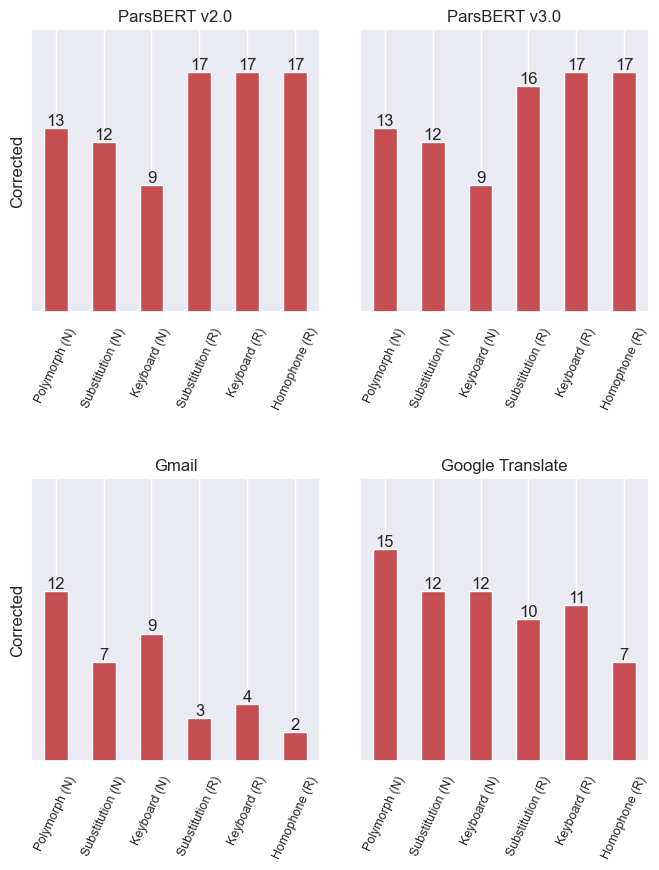

In [163]:
fig, axes = plt.subplots(2, 2, figsize=(7, 8), sharey=True)
fig.tight_layout(h_pad=8)
dfs = [df_pure_b, df_zwnj_b, df_gmail, df_google_translate]
titles = ['ParsBERT v2.0', 'ParsBERT v3.0', 'Gmail', 'Google Translate']

for i in range(4):
    b1 = axes[i // 2][i % 2].bar(
        [
            "Polymorph (N)",
            "Substitution (N)",
            "Keyboard (N)",
            "Substitution (R)",
            "Keyboard (R)",
            "Homophone (R)"
        ],
        dfs[i]["Corrected"].values,
        0.5,
        color="r",
        label="Corrected Errors",
    )
    axes[i // 2][i % 2].bar_label(b1)
    
    # axes[i // 2][i % 2].bar(
    #     [
    #         "Polymorph (N)",
    #         "Substitution (N)",
    #         "Keyboard (N)",
    #         "Substitution (R)",
    #         "Keyboard (R)",
    #         "Homophone (R)"
    #     ],
    #     (dfs[i]["All"] - dfs[i]["Corrected"]).values,
    #     0.5,
    #     bottom=dfs[i]["Corrected"].values,
    #     color="r",
    #     alpha=0.4,
    #     label="Missed Errors",
    # )
    axes[i // 2][i % 2].set_xticklabels(
        [
            "Polymorph (N)",
            "Substitution (N)",
            "Keyboard (N)",
            "Substitution (R)",
            "Keyboard (R)",
            "Homophone (R)",
        ],
        rotation=65,
        fontsize=9,
    )
    axes[i // 2][i % 2].set_yticks([])
    axes[i // 2][i % 2].set_ylim([0, 20])
    
    axes[i // 2][i % 2].set_title(titles[i])
    if i % 2 == 0:
        axes[i // 2][i % 2].set_ylabel("Corrected")
    # if i == 3:
    #     axes[i // 2][i % 2].legend(loc=4, fontsize=8)
# plt.savefig("C:/Users/asus/OneDrive/Desktop/VecPictures/fig5.pdf", format="pdf", bbox_inches="tight")

##### Error Analysis


In [164]:
non_real_word_table(bert_zwnj_model['unb']['1e-5'])

,All,Corrected,Precision
Non-Real Word,,,
Total,14997,11408,"76.07 (Micro), 76.07 (Macro)"
Polymorph,4997,3752,75.09
Substitution,5000,3774,75.48
Keyboard,5000,3882,77.64


In [165]:
real_word_table(bert_pure_model['b']['1e-5'])

All   True  False                     Precision  \
Real Word    Type                                                         
Total        Error    11021  10157    789  92.79 (Micro), 94.05 (Macro)   
             Correct  11022  10233    864                                 
Homophone    Error     1021    994     25                         97.55   
             Correct   1022    997     27                                 
Substitution Error     5000   4699    274                         94.49   
             Correct   5000   4726    301                                 
Keyboard     Error     5000   4464    490                         90.11   
             Correct   5000   4510    536                                 

                                            Recall  \
Real Word    Type                                    
Total        Error    92.16 (Micro), 93.54 (Macro)   
             Correct                                 
Homophone    Error                           97.36   
             Correct                                 
Substitution Error                           93.98   
             Correct                                 
Keyboard     Error                           89.28   
             Correct                                 

                                         FP Rate                     Accuarcy  \
Real Word    Type                                                               
Total        Error    7.16 (Micro), 5.91 (Macro)  92.5 (Micro), 93.81 (Macro)   
             Correct                                                            
Homophone    Error                          2.45                        97.45   
             Correct                                                            
Substitution Error                          5.48                        94.25   
             Correct                                                            
Keyboard     Error                           9.8                        89.74   
             Correct                                                            

                                          F1-Score  
Real Word    Type                                   
Total        Error    92.47 (Micro), 93.24 (Macro)  
             Correct                                
Homophone    Error                           97.45  
             Correct                                
Substitution Error                           92.57  
             Correct                                
Keyboard     Error                           89.69  
             Correct

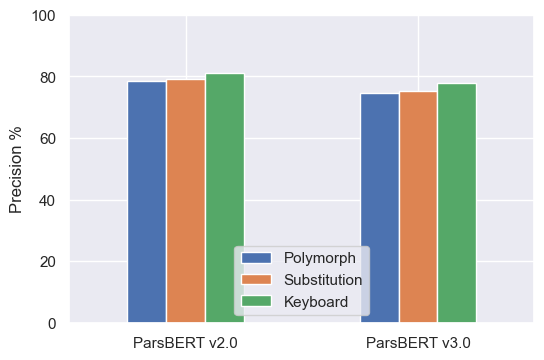

In [166]:
models = ['ParsBERT v2.0', 'ParsBERT v3.0']
b = non_real_word_table(bert_zwnj_model['b']['1e-5']).loc[['Polymorph', 'Substitution', 'Keyboard'], ['Precision']]
a = non_real_word_table(bert_pure_model['b']['1e-5']).loc[['Polymorph', 'Substitution', 'Keyboard'], ['Precision']]

result = pd.merge(a, b, left_index=True, right_index=True, suffixes=[' bert-fa-base-uncased', ' bert-fa-zwnj-base'])

ax = result.T.plot.bar(figsize=(6, 4))
ax.set_xticklabels(labels= models, rotation=0)
ax.set_ylabel('Precision %')
ax.legend(loc=8);
ax.set_ylim([0, 100]);
# plt.savefig("C:/Users/asus/OneDrive/Desktop/VecPictures/fig6.pdf", format="pdf", bbox_inches="tight")

In [167]:
idx = pd.IndexSlice


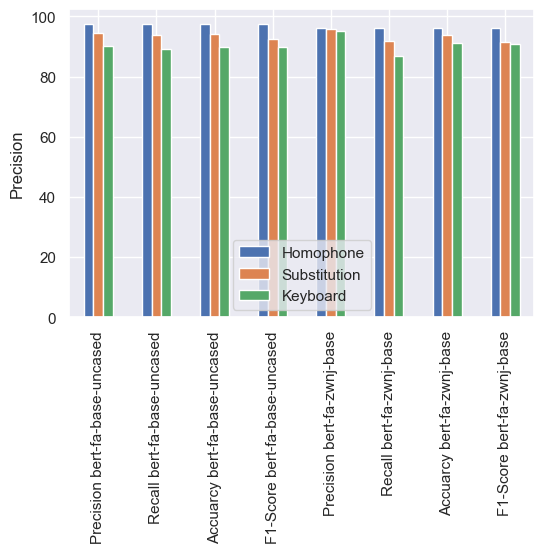

In [168]:
models = ['bert-fa-base-uncased (biased)', 'bert-fa-zwnj-base (biased)']
b = real_word_table(bert_zwnj_model['b']['1e-5']).loc[idx[['Homophone', 'Substitution', 'Keyboard'], 'Error'], ['Precision', "Recall", "Accuarcy", "F1-Score"]].droplevel(1)
a = real_word_table(bert_pure_model['b']['1e-5']).loc[idx[['Homophone', 'Substitution', 'Keyboard'], 'Error'], ['Precision', "Recall", "Accuarcy", "F1-Score"]].droplevel(1)

result = pd.merge(a, b, left_index=True, right_index=True, suffixes=[' bert-fa-base-uncased', ' bert-fa-zwnj-base'])

ax = result.T.plot.bar(figsize=(6, 4))
# ax.set_xticklabels(labels= models, rotation=0)
ax.set_ylabel('Precision')
ax.legend(loc=8);

In [169]:
df_result = result[result.columns.sort_values()].set_axis(
    pd.MultiIndex.from_product(
        [
            ["Accuracy", "F1-Score", "Precision", "Recall"],
            ["bert-fa-base-uncased", "bert-fa-zwnj-base"],
        ], names=['Metric', 'Model']
    ), axis=1
)

A = df_result['Accuracy']

R = df_result['Recall']

P = df_result['Precision']

In [170]:
df_result['F1-Score']

Model,bert-fa-base-uncased,bert-fa-zwnj-base
Real Word,,
Homophone,97.45,96.22
Substitution,92.57,91.49
Keyboard,89.69,90.88


In [171]:
non_real_word_table(bert_zwnj_model['unb']['1e-5'])

,All,Corrected,Precision
Non-Real Word,,,
Total,14997,11408,"76.07 (Micro), 76.07 (Macro)"
Polymorph,4997,3752,75.09
Substitution,5000,3774,75.48
Keyboard,5000,3882,77.64


In [172]:
non_real_word_table(bert_pure_model['unb']['1e-5'])

,All,Corrected,Precision
Non-Real Word,,,
Total,14997,11898,"79.34 (Micro), 79.34 (Macro)"
Polymorph,4997,3900,78.05
Substitution,5000,3949,78.98
Keyboard,5000,4049,80.98


In [173]:
real_word_table(bert_zwnj_model['b']['1e-5'])

All   True  False                    Precision  \
Real Word    Type                                                        
Total        Error    11021   9910    456  95.6 (Micro), 95.77 (Macro)   
             Correct  11022  10566   1111                                
Homophone    Error     1021    982     38                        96.27   
             Correct   1022    984     39                                
Substitution Error     5000   4584    202                        95.78   
             Correct   5000   4798    416                                
Keyboard     Error     5000   4344    216                        95.26   
             Correct   5000   4784    656                                

                                            Recall  \
Real Word    Type                                    
Total        Error    89.92 (Micro), 91.58 (Macro)   
             Correct                                 
Homophone    Error                           96.18   
             Correct                                 
Substitution Error                           91.68   
             Correct                                 
Keyboard     Error                           86.88   
             Correct                                 

                                         FP Rate  \
Real Word    Type                                  
Total        Error    4.14 (Micro), 4.03 (Macro)   
             Correct                               
Homophone    Error                          3.72   
             Correct                               
Substitution Error                          4.04   
             Correct                               
Keyboard     Error                          4.32   
             Correct                               

                                          Accuarcy  \
Real Word    Type                                    
Total        Error    92.89 (Micro), 93.78 (Macro)   
             Correct                                 
Homophone    Error                           96.23   
             Correct                                 
Substitution Error                           93.82   
             Correct                                 
Keyboard     Error                           91.28   
             Correct                                 

                                          F1-Score  
Real Word    Type                                   
Total        Error    92.67 (Micro), 92.86 (Macro)  
             Correct                                
Homophone    Error                           96.22  
             Correct                                
Substitution Error                           91.49  
             Correct                                
Keyboard     Error                           90.88  
             Correct

In [174]:
real_word_table(bert_pure_model['b']['1e-5'])

All   True  False                     Precision  \
Real Word    Type                                                         
Total        Error    11021  10157    789  92.79 (Micro), 94.05 (Macro)   
             Correct  11022  10233    864                                 
Homophone    Error     1021    994     25                         97.55   
             Correct   1022    997     27                                 
Substitution Error     5000   4699    274                         94.49   
             Correct   5000   4726    301                                 
Keyboard     Error     5000   4464    490                         90.11   
             Correct   5000   4510    536                                 

                                            Recall  \
Real Word    Type                                    
Total        Error    92.16 (Micro), 93.54 (Macro)   
             Correct                                 
Homophone    Error                           97.36   
             Correct                                 
Substitution Error                           93.98   
             Correct                                 
Keyboard     Error                           89.28   
             Correct                                 

                                         FP Rate                     Accuarcy  \
Real Word    Type                                                               
Total        Error    7.16 (Micro), 5.91 (Macro)  92.5 (Micro), 93.81 (Macro)   
             Correct                                                            
Homophone    Error                          2.45                        97.45   
             Correct                                                            
Substitution Error                          5.48                        94.25   
             Correct                                                            
Keyboard     Error                           9.8                        89.74   
             Correct                                                            

                                          F1-Score  
Real Word    Type                                   
Total        Error    92.47 (Micro), 93.24 (Macro)  
             Correct                                
Homophone    Error                           97.45  
             Correct                                
Substitution Error                           92.57  
             Correct                                
Keyboard     Error                           89.69  
             Correct

Text(0.5, 1.0, 'ParsBERT v3.0')

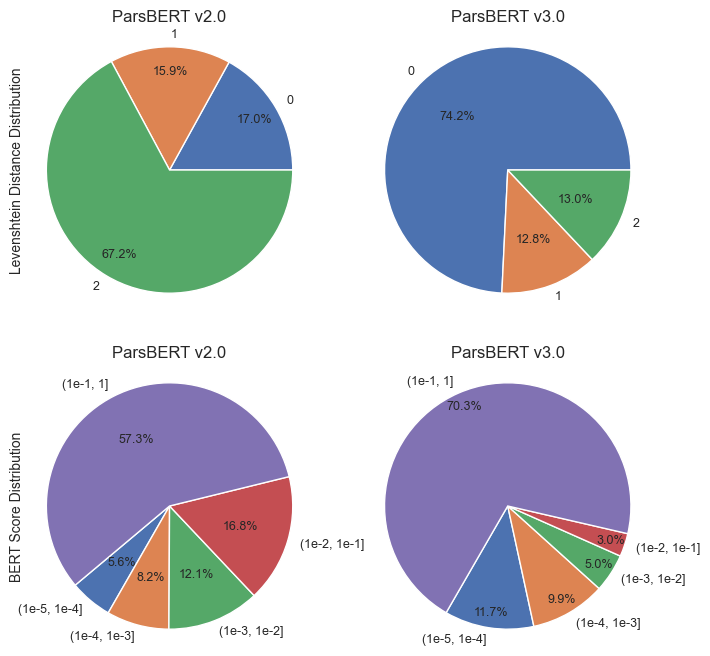

In [175]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 2, figsize=(8, 8))


a = (
    bert_pure_model["b"]["1e-5"]
    .query("type == 'keyboard_realword_error' and correct_word != mix_word")[
        "mix_levenshtein_score"
    ]
    .value_counts()
    .sort_index()
    .values
)

a2 = bert_pure_model["b"]["1e-5"].query(
    "type == 'keyboard_realword_error' and correct_word != mix_word"
)

a2 = (
    (a2["mix_word"] + "|" + a2["candidate_word"])
    .apply(lambda x: get_levenshtein_distance(*x.split("|")))
    .value_counts()
    .sort_index()
    .values
)


axis[0][0].pie(
    a2, labels=["0", "1", "2"], autopct="%1.1f%%", textprops={"fontsize": 9}, radius=1.1, pctdistance=0.8,
)
axis[0][0].set_ylabel("Levenshtein Distance Distribution", fontsize=10)
axis[0][0].set_title("ParsBERT v2.0")

b = (
    bert_zwnj_model["b"]["1e-5"]
    .query("type == 'keyboard_realword_error' and correct_word != mix_word")[
        "mix_levenshtein_score"
    ]
    .value_counts()
    .sort_index()
    .values
)

b2 = bert_zwnj_model["b"]["1e-5"].query(
    "type == 'keyboard_realword_error' and correct_word != mix_word"
)

b2 = (
    (b2["mix_word"] + "|" + b2["candidate_word"])
    .apply(lambda x: get_levenshtein_distance(*x.split("|")))
    .value_counts()
    .sort_index()
    .values
)

axis[0][1].pie(
    b2,
    labels=["0", "1", "2"],
    autopct="%1.1f%%",
    radius=1.1,
    textprops={"fontsize": 9},
)
# axis[0][1].set_ylabel("Levenshtein distance distribution", fontsize=9)
axis[0][1].set_title("ParsBERT v3.0")

c = pd.cut(
    bert_pure_model["b"]["1e-5"].query(
        "type == 'keyboard_realword_error' and correct_word != mix_word"
    )["mix_bert_score"],
    bins=pd.IntervalIndex.from_tuples(
        [(1e-5, 1e-4), (1e-4, 1e-3), (1e-3, 1e-2), (1e-2, 1e-1), (1e-1, 1)]
    ),
).value_counts(sort=False)

axis[1][0].pie(
    c,
    labels=[
        "(1e-5, 1e-4]",
        "(1e-4, 1e-3]",
        "(1e-3, 1e-2]",
        "(1e-2, 1e-1]",
        "(1e-1, 1]",
    ],
    autopct="%1.1f%%",
    textprops={"fontsize": 9},
    pctdistance=0.6,
    radius=1.1,
    startangle=-140
)

axis[1][0].set_ylabel("BERT Score Distribution", fontsize=10)
axis[1][0].set_title("ParsBERT v2.0")

d = pd.cut(
    bert_zwnj_model["b"]["1e-5"].query(
        "type == 'keyboard_realword_error' and correct_word != mix_word"
    )["mix_bert_score"],
    bins=pd.IntervalIndex.from_tuples(
        [(1e-5, 1e-4), (1e-4, 1e-3), (1e-3, 1e-2), (1e-2, 1e-1), (1e-1, 1)]
    ),
).value_counts(sort=False)

axis[1][1].pie(
    d,
    labels=[
        "(1e-5, 1e-4]",
        "(1e-4, 1e-3]",
        "(1e-3, 1e-2]",
        "(1e-2, 1e-1]",
        "(1e-1, 1]",
    ],
    autopct="%1.1f%%",
    textprops={"fontsize": 9},
    pctdistance=0.88,
    radius=1.1,
    startangle=-120,
)
axis[1][1].set_title("ParsBERT v3.0")
# plt.savefig("C:/Users/asus/OneDrive/Desktop/VecPictures/fig7_3.pdf", format="pdf", bbox_inches="tight")